In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# seaborn库简介

## 什么是seaborn？

Seaborn是基于matplotlib的图形可视化python包。它提供了一种高度交互式界面，便于用户能够做出各种有吸引力的统计图表。

Seaborn是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，在大多数情况下使用seaborn能做出很具有吸引力的图，而使用matplotlib就能制作具有更多特色的图。应该把Seaborn视为matplotlib的补充，而不是替代物。同时它能高度兼容numpy与pandas数据结构以及scipy与statsmodels等统计模式。

## 为什么使用seaborn？

Seaborn是一种基于matplotlib的图形可视化库。他提前已经定义好了一套自己的风格，也封装了一系列的方便的绘图函数。如果使用matplotlib，想要绘制精美的图形需要大量的调优代码才能完成，使用seaborn可能就是一行代码的事情。总结一句话：使用seaborn绘图比matplotlib更好看，更简单！

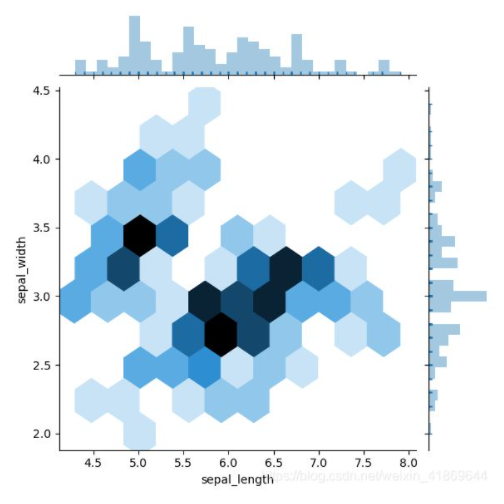

# 关系绘图：relplot

统计分析是这样的一个过程：尝试去理解一个数据集中变量之间的关系，以及这些关系如何受到其他变量的影响。可视化是这个过程的核心元素，因为当数据以非常恰当的方式展示出来时，我们可以非常直观地观察到某些趋势或者模式，而这些，就揭示了变量之间的关系。

sns.replot这个函数功能非常强大，可以用来表示多个变量之间的关联关系。默认情况下是绘制散点图，也可以绘制线性图，具体绘制什么图形是通过kind参数来决定的。实际上以下两个函数就是relplot的特例：

* **scatterplot**：relplot(kind='scatter',the default)
* **lineplot**：relplot(kind='line')

## 基本使用

默认调用seaborn的格式为：

In [2]:
import seaborn as sns

# 设置seaborn样式
sns.set(color_codes=True)

接下来，我们使用数据集tips(小费数据集)来演示散点图relplot(kind='scatter')

In [3]:
# 获取样本数据集tips
tips = pd.read_csv("./data/tips.csv")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


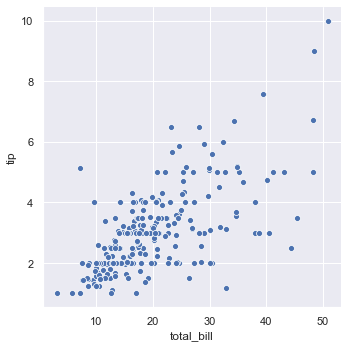

In [4]:
# 绘制散点图.relplot中kind的默认参数为‘scatter’,所以可不写
sns.relplot(x="total_bill",y="tip",data=tips)

## 添加hue参数

hue参数是用来控制第三个变量的颜色显示的。比如我们在以上图的基础之上体现出星期几的参数，那么可以通过以下代码来实现：

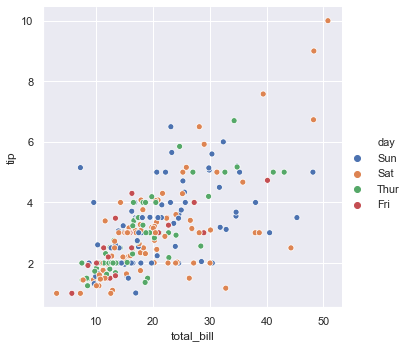

In [5]:
# 添加hue参数，显示第三个变量day的区别
sns.relplot(x="total_bill",y="tip",hue="day",data=tips)

## 添加col和row参数

col和row，可以将图根据某个属性的值的个数分割成多列或者多行。比如在以上图的基础之上我们想要把Lunch(午餐)和Dinner(晚餐)分割成两个图来显示，那么可以通过以下代码来实现：

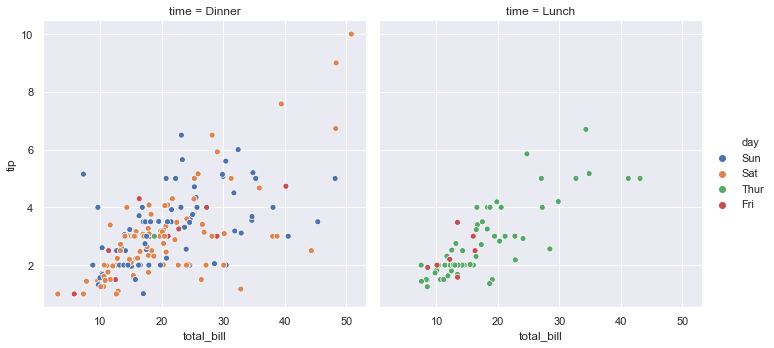

In [6]:
# 添加col参数，把时间的区别显示出来
sns.relplot(x="total_bill",y="tip",hue="day",col="time",data=tips)

* 也可以再在row上添加一个新的变量，比如把性别按照行显示出来，代码如下：

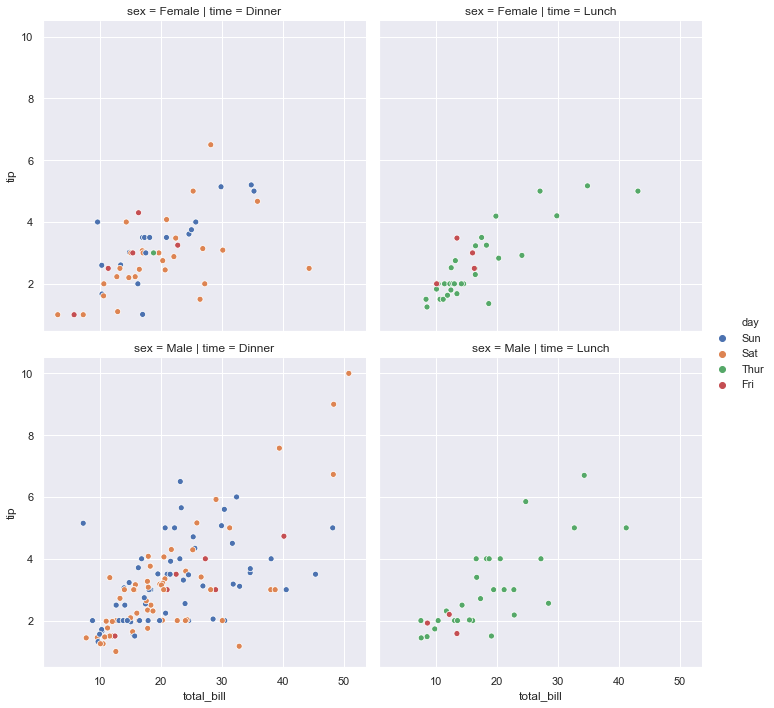

In [7]:
# 添加row参数，把性别的区别展示出来
sns.relplot(x="total_bill",y="tip",hue="day",col="time",
            row="sex",data=tips)

## 指定具体的列

有时候我们的图有很多，默认情况下会在一行中全部展示出来，那么我们可以通过col_wrap来指定具体多少列。示例代码如下：

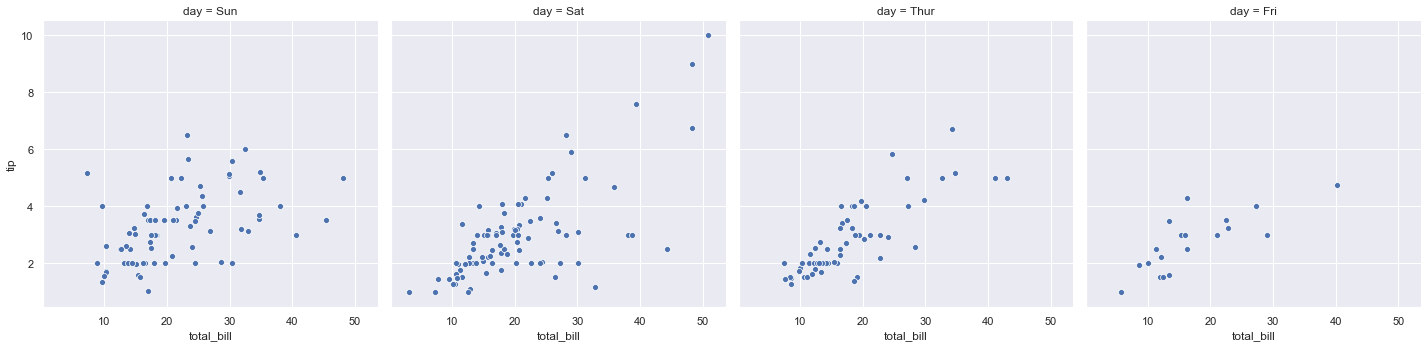

In [8]:
# 默认情况下会在一行中全部展示出来
sns.relplot(x="total_bill",y="tip",col="day",data=tips)

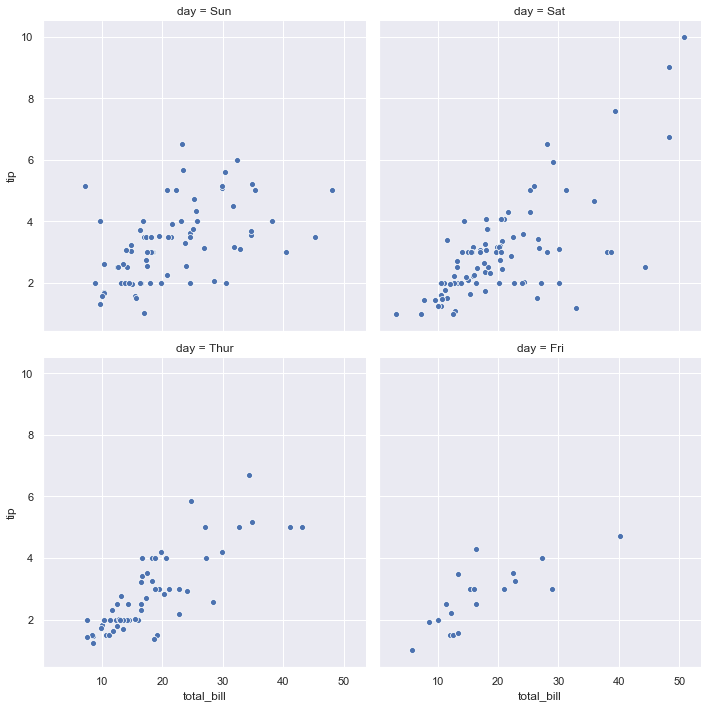

In [9]:
# 可以通过col_wrap来指定具体多少列
sns.relplot(x="total_bill",y="tip",col="day",col_wrap=2,data=tips)

## 绘制折线图

散点图很高效，但是没有哪种可视化类型可以完美应对所有情况。事实上，我们的可视化呈现方式要适应数据集的种类以及我们想要通过图形回答的问题。

在某些数据集中，我们可能想要理解某个变量随着时间的变化规律，或者想要理解某个连续型的变量。这种情况下，线图会是一个不错的选择。在seaborn中，我们可以通过lineplot()函数或者使用带有kind="line"参数的relplot()来实现线图的绘制。


In [10]:
# 我们导入fmri（核磁共振）数据集
fmri = pd.read_csv("./data/fmri.csv")
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


* 在更多复杂的数据集中，会出现一个x轴变量对应了多个观测值（y）的情况。seaborn会默认将多个观测值聚合起来，并且将它们的**均值**以及**95%的置信区间**展示出来：

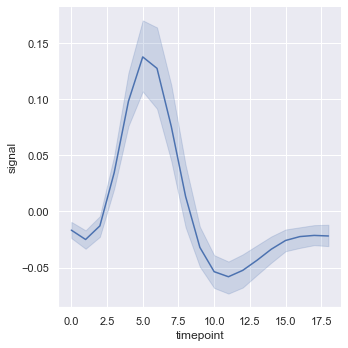

In [11]:
# 使用relplot(kind='line')来绘制折线图
sns.relplot(x="timepoint",y="signal",kind="line",data=fmri)

* 置信区间是通过自助采样法（bootstrapping）计算的，这在遇到大型数据集时可以帮助我们节省时间。当然，我们也可以禁止它。

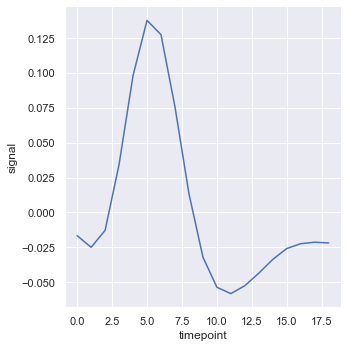

In [12]:
# 禁用置信区间
sns.relplot(x="timepoint", y="signal", ci=None,
            kind="line", data=fmri)

当然也可以添加其他的参数，用来控制整个图的样式和结构。示例代码如下：
* 设置hue为event，就会根据event来绘制不同的颜色
* 设置col为region，就会根据region值的个数来绘制指定个数的图
* 设置style为event，就会根据event来设置线条的样式

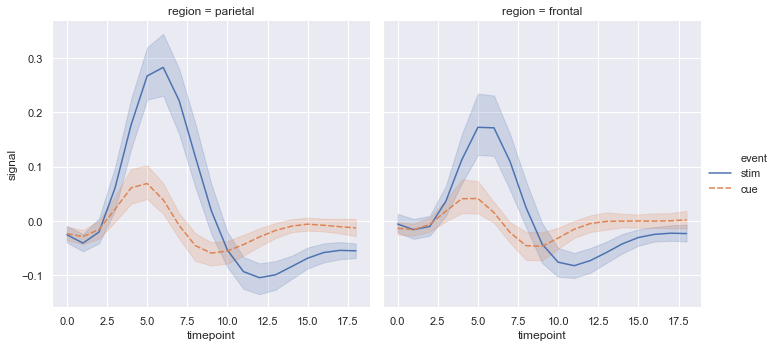

In [13]:
# 添加其他参数
sns.relplot(x="timepoint",y="signal",kind="line",
            hue="event",col="region",style="event",data=fmri)

# 分类绘图：catplot

在统计关系可视化教程中，我们学会了使用多种不同的方式来展示一个数据集中多个变量之间的关系。在一系列的例子中，我们聚焦于那些关系主要存在于两个数值型变量之间的情况。然而当其中一个变量是分类（离散）变量时，我们不妨使用更加有针对性的可视化方法。

在seaborn中，有多种不同的方式来展示包含了分类数据的变量关系。正如relplot()和scatterplot()/lineplot()之间的关系一样，我们可以使用catplot()函数来描述分类数据，也可以使用更多坐标轴级别的绘图函数来完成这些任务。catplot()提供了对这些axes-level的函数的整合，将他们放在了一个更高级别的统一的接口之中。

我们将分类可视化图形分为三类：分类散点图，分类分布图和分类统计图。

* 1. 分类散点图：
    * stripplot(): 或catplot(kind="strip", the default)
    * swarmplot(): 或catplot(kind="swarm")
* 2. 分类分布图：
    * boxplot(): 或catplot(kind="box")
    * violinplot(): 或catplot(kind="violin")
    
* 3. 分类统计图
    * barplot(): 或catplot(kind="bar")
    * pointplot(): 或catplot(kind="point")
    * countplot():或catplot(kind="count")
    
这些分类从不同的粒度来展示数据。想要知道哪个更合适，就需要我们认真思考我们到底要回答什么问题。catplot()提供的统一的API可以帮助我们轻松地在不同方法间切换并从不同的视角理解数据。

## 分类散点图

在绘制分类散点图时，我们会遇到一个挑战，当在同一个类别中出现大量取值相同或接近的观测数据时，他们会挤到一起。seaborn中有两种分类散点图，分别以不同的方式处理了这个问题。

* stripplot()：catplot(kind="strip")，默认的。
* swarmplot()：catplot(kind="swarm")。

### stripplot
catplot()使用的默认方式是stripplot()，它给这些散点增加了一些随机的偏移量：

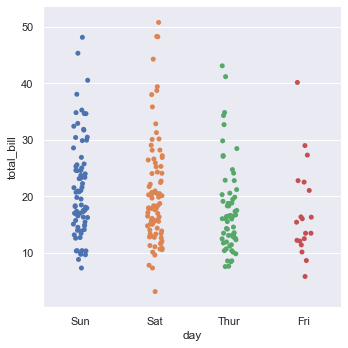

In [14]:
# 使用tips数据集演示分类散点图
tips = pd.read_csv("./data/tips.csv")
sns.catplot(x="day", y="total_bill", data=tips)

* jitter参数控制着偏移量的大小，或者我们可以直接禁止他们偏移：

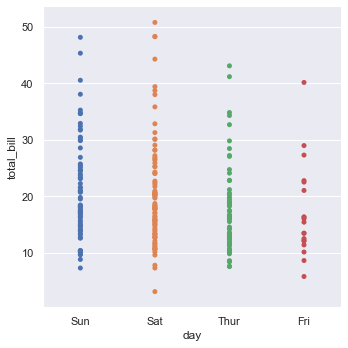

In [15]:
# 添加jitter参数控制偏移量
sns.catplot(x="day", y="total_bill", jitter=False, data=tips)

### swarmplot
第二种解决方式使用算法避免了散点之间的重合。它提供了更好的方式来呈现观测点的分布，但是它仅适用于较小的数据集。

这种图被叫做蜂群图，在seaborn中我们用swarmplot()或者catplot(kind="swarm")来绘制它：

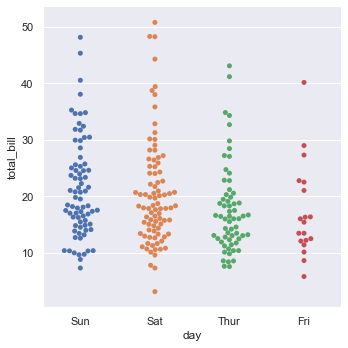

In [16]:
# 绘制蜂群图
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)

* 与关系图(relplot())类似，我们也可以使用hue参数来增加一个新的维度（**但是分类图不支持size和style**）。不同的分类图对于hue参数的处理不太一样，对于散点图而言，它仅仅控制散点的颜色就足够了：

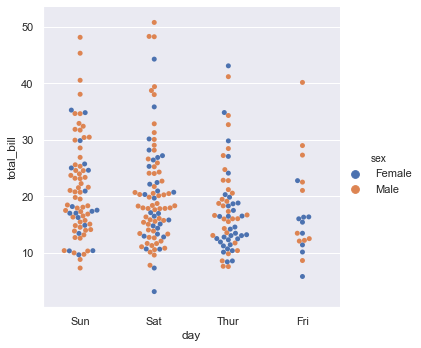

In [17]:
# 添加hue参数来增加一个维度
sns.catplot(x="day", y="total_bill", hue="sex", 
            kind="swarm", data=tips)

### 横向分类散点图

我们前边涉及到过“分类坐标轴”，在这些例子中，我们的分类水平都与水平坐标轴绑定。但是有些时候我们把分类变量放在垂直坐标轴上会更有帮助（尤其是当分类名称较长或者分类较多时）。**我们只需要交换x和y分配的变量即可**：

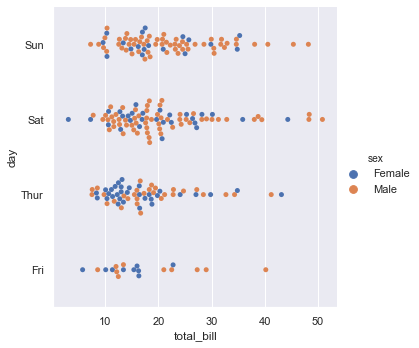

In [18]:
# 交换x和y的变量，即可绘制横向分类散点图
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="swarm", data=tips)

## 分类分布图

当数据集的大小越来越大，分类散点图在表现不同分类的观测值的分布信息时就越发显得捉襟见肘。此时，我们有一些方法，能以清晰明了的对比方式来总结不同分类下的观测值分布信息。

### 箱型图：boxplot

箱线图:它能在图中展现出数据的上下四分位数、中文数以及一些极值。箱体上下方的须线会分别向上和向下延伸1.5倍IQR（上下四分位数之间的距离），落在这个区域之外的点会单独显示为离群点（异常值）。


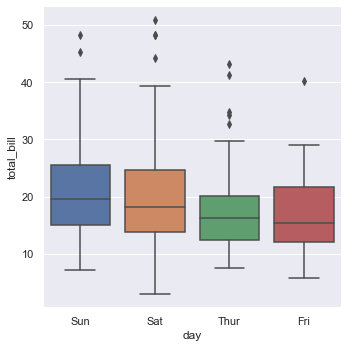

In [19]:
# 绘制箱型图
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

* 我们可以增加一个hue参数，这样就可以进一步增加一个维度来观察数据分布：

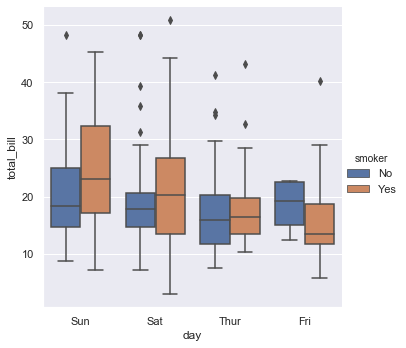

In [20]:
# 添加hue参数
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="box", data=tips)

* boxenplot()是一个与boxplot()相关的函数，它绘制的是与箱线图相似但是能展示更多关于数据分布形状的信息，它对大数据更加友好：

In [21]:
# 导入数据
diamonds = pd.read_csv("./data/diamonds.csv")
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


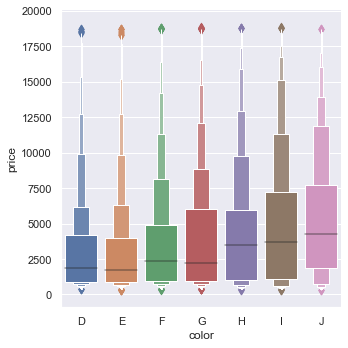

In [22]:
# 使用boxenplot对大数据进行箱型图绘制
sns.catplot(x="color", y="price", kind="boxen",
            data=diamonds.sort_values("color"))

### 小提琴图：violinplot

另一种方法是violinplot()，它将箱线图与核密度估计过程结合了起来：

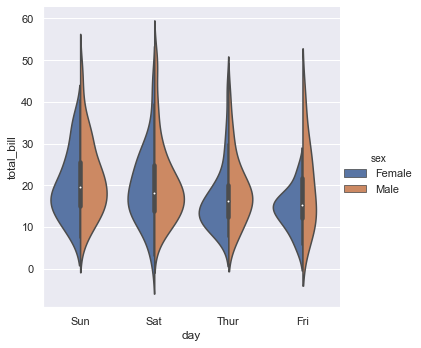

In [23]:
# 绘制小提琴图
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", data=tips,split=True)

* 在小提琴图中，我们有许多选项可以调整小提琴内部的内容，比如我们可以展示每个观测点的位置而非统计量,可以通过inner参数修改(提琴的中间默认绘制的是箱线图):

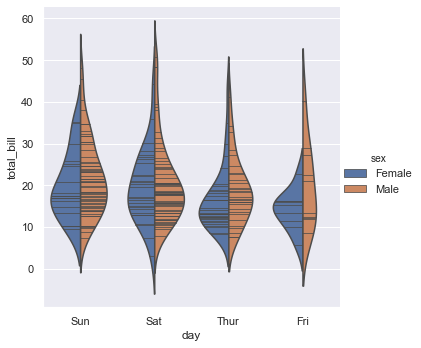

In [24]:
# 修改inner参数修改中间默认的箱型图为线条
sns.catplot(x="day", y="total_bill", hue="sex",kind="violin",
            inner="stick", split=True,data=tips);

* 我们还可以将swarmplot()或stripplot()与箱线图或者小提琴图结合起来，这样我们就可以同时看到每个观测值的分布以及关于分布形态的统计量情况（分位数、极值等）：

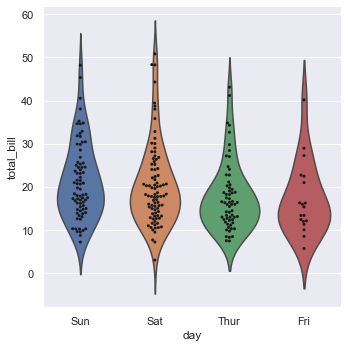

In [25]:
# 结合散点图和箱型图
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax);

## 分类统计图

在某些应用场景中，相对于展示每个分类的数据分布，我们可能更想展示每个分类中数据的集中趋势估计（统计量，比如均值、中位数、方差等）。

### 条形图：barplot

在seaborn中，barplot()函数在整个数据集上运行，并且应用一个函数来获得那些统计量（默认为均值）。当每个分类中有多个观测值时，它还可以通过自助采样法计算出一个置信区间，并且通过误差棒的方式绘制出来。

In [26]:
# 获取数据集titanic
titanic = pd.read_csv("./data/titanic.csv")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


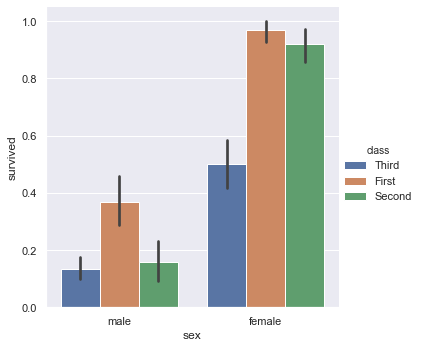

In [27]:
# 绘制条形图
sns.catplot(x="sex", y="survived", hue="class", 
            kind="bar", data=titanic)

### 点线图：pointplot

我们也可以使用pointplot()来表现同样的信息。点图也使用高度来编码统计量，但是区别在于它不会画出一个完整的长条，而是用一个点以及置信区间来替代；另外，它还会将属于同一个hue分类的点连起来。这样，我们就可以很容易看到hue变量是如何影响坐标轴上的分类变量的（交互作用），因为不同线条的斜率简直是一目了然：

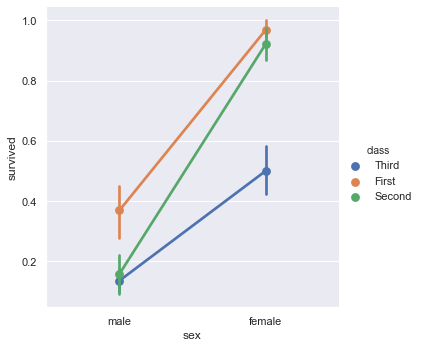

In [28]:
# 绘制电线图
sns.catplot(x="sex", y="survived", hue="class", 
            kind="point", data=titanic)

* 我们前边提到，分类绘图函数是没有style这一参数的（在relplot()中有）。但是我们同样可以修改线条和点的样式，使得我们的图片更有可读性，甚至可以在黑白色调下表现分类信息

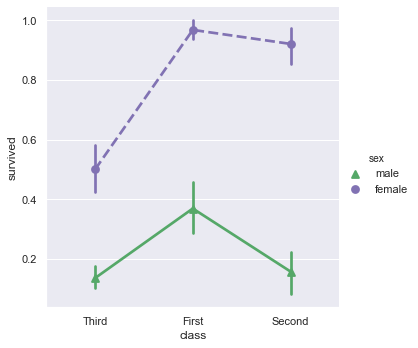

In [29]:
# 修改线条和点的样式
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic);

### 计数图：countplot

计数图可以展示每个分类下观测值（样本）的数量而非统计量。这就像是“属于分类变量而非连续变量的直方图”。在seaborn中，我们可以使用countplot()轻易地达成目的：

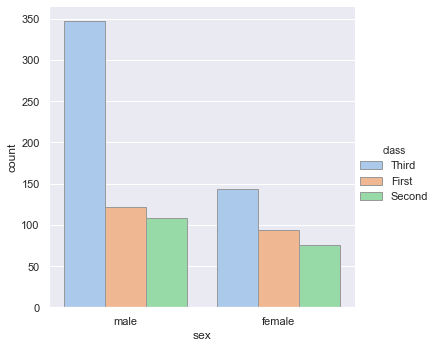

In [30]:
# 绘制计数图
sns.catplot(x="sex", hue="class", kind="count",palette="pastel", 
            edgecolor=".6", data=titanic)

# 分布绘图

当我们上手一个数据集时，往往第一件事就是了解每个变量是如何分布的。这一部分会简单地演示如何在seaborn中检验一维分布和二维分布。

* distplot:一维分布
* jointplot：多维分布

## 一维分布：distplot

在seaborn中，查看单变量分布情况最方便的方法就是使用distplot()函数。默认情况下，它会画一个直方图，并且做一个核密度估计（KDE）曲线。

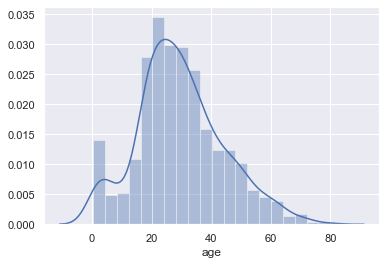

In [31]:
# 导入titanic数据集,并绘制关于年龄的直方图
titanic = pd.read_csv("./data/titanic.csv")
sns.distplot(titanic['age'])

distplot有以下常用参数：
* kde（核密度曲线）：代表是否要显示kde曲线，默认是显示的。
* bins：代表直方图区间的数量，可以通过自己设置数目。
* rug：代表是否显示底部的胡须下线，下面的胡须线越密集，说明数据量越多

* 如果显示kde曲线（默认），那么y轴表示的是概率；也可以设置kde参数为False，那么y值代表的是数量。

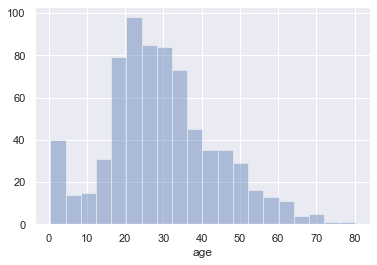

In [32]:
# 关闭kde曲线
sns.distplot(titanic['age'],kde=False)

* 可以设置bins参数来控制直方图区间的数量。

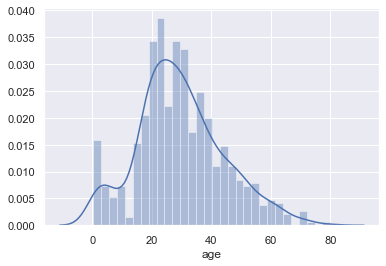

In [33]:
# 设置直方图区间的数量为30
sns.distplot(titanic['age'],bins=30)

* 可以设置rug参数为True来显示底部的胡须。

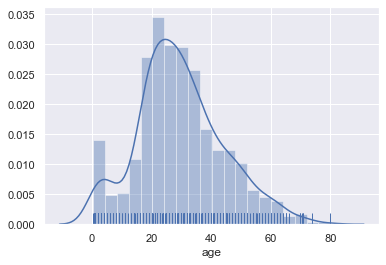

In [34]:
# 设置rug参数来显示底部的胡须
sns.distplot(titanic['age'],rug=True)

## 二维分布：jointplot

将两个变量的联合分布形态可视化出来往往会很有用。在seaborn中，最简单的实现方式是使用jointplot()函数，它会生成多个面板，不仅展示了两个变量之间的关系，也在两个坐标轴上分别展示了每个变量的分布。

### 散点图

最常见的展示二元分布的方法是使用散点图，我们使用x、y两个坐标轴来定位每一个观测值。它类似于二维的地毯图。我么可以使用matplotlib中的plt.scatter()函数来绘制散点图，同时，jointplot()的默认绘制类型也是散点图。


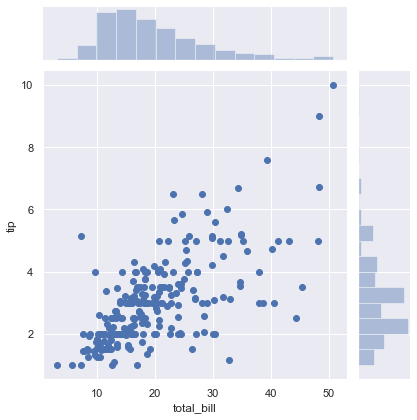

In [35]:
# 导入tips数据集，并显示两个变量之间的关系
tips = pd.read_csv("./data/tips.csv")
sns.jointplot(x='total_bill',y='tip',data=tips)

### 六边形图

六边图（Hexbin），可以视为二维世界中的直方图，因为它展示了每个小六边形中观测点的数量。这种图在**大数据集**上表现最佳。我们使用matplotlib的plt.hexbin函数以及seaborn的jointplot(kind="hex")都可以绘制它。白色背景与六边图看起来更配哦：

* 现在有一份奥运会人员的数据，现在想要查看中国运动员身高和体重的分布情况：

In [36]:
# 导入一份奥运会人员数据
athletes = pd.read_csv("./data/athlete_events.csv")
athletes

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [37]:
# 筛选中国运动员
chinese_athletes = athletes[athletes['NOC']=='CHN']
chinese_athletes

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
1072,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN
2611,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN
2612,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270443,135272,Zou Wenzhi,M,NaN,NaN,NaN,China,CHN,1948 Summer,1948,Summer,London,Football,Football Men's Football,NaN
270444,135273,Zou Yuchen,M,20.0,203.0,107.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Men's Basketball,NaN
270445,135274,Zou Zhenxian,M,28.0,184.0,72.0,China,CHN,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Men's Triple Jump,NaN
270559,135318,Zu Lijun,M,26.0,188.0,87.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 10 kilometres Open Water,NaN


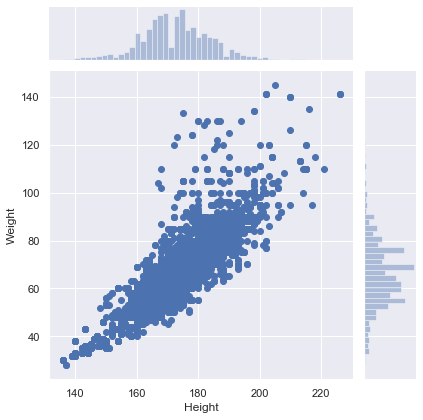

In [38]:
# 使用散点图查看身高和体重的分布情况
sns.jointplot(x="Height",y="Weight",data=chinese_athletes)

针对这种数据量比较大的情况，可以采用六边形图来绘制，也就是将之前的散点变成六边形，六边形有一个区间大小，之前这些点落在这个六边形中越多颜色越深。示例代码如下：

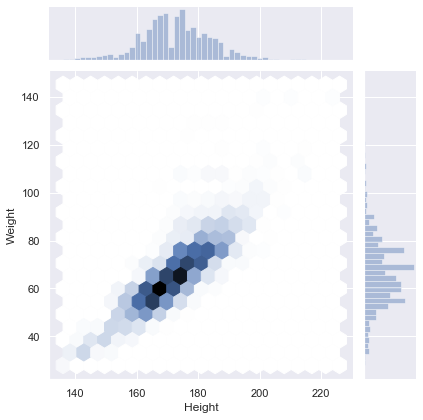

In [39]:
# 使用六边形图对身高和体重的分布进行绘制
sns.jointplot(x="Height",y="Weight",data=chinese_athletes,
              kind="hex",gridsize=20)

## 成对绘图：pairplot

成对关系的可视化是指在一个数据集的所有变量中，两两之间的关系。假如我们想要看多个变量中两两组合之间的联合分布情况，我们可以使用pairplot()函数，它会创建一个由多个坐标轴构成的矩阵，然后把两两之间（一般是DataFrame的列之间的组合）的关系分别绘制在不同的坐标轴上去。默认情况下，它还会将每个变量自己的分布情况画在对角线的位置：

比如iris鸢尾花数据，我们想要看到petal_width、petal_height、sepal_width以及sepal_height之间的关系，那么我们就可以通过pairplot来绘制。示例代码如下：

In [40]:
# 导入iris鸢尾花数据集
iris = pd.read_csv("./data/iris.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


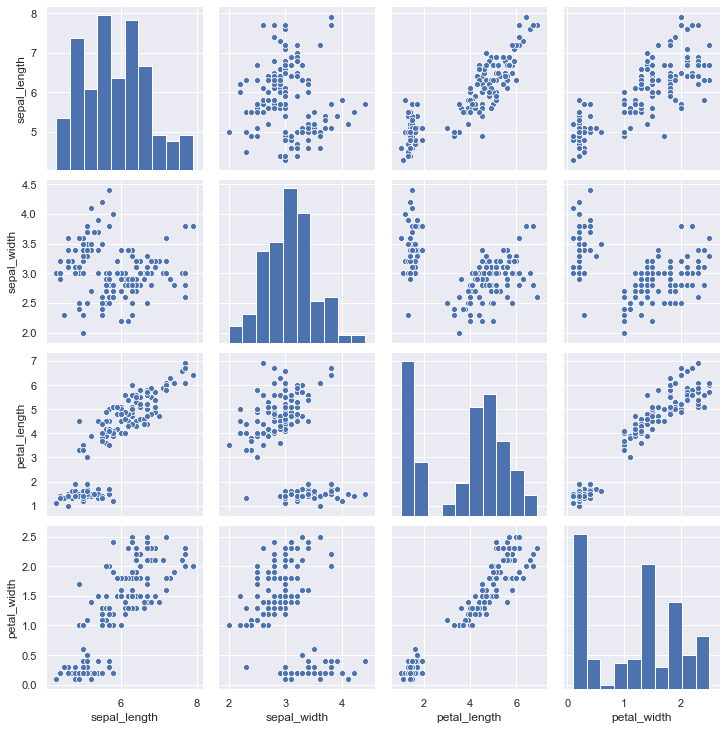

In [41]:
# 对iris数据集的变量进行两两组合展示分布关系
sns.pairplot(iris)

默认情况下，对角线的图（x和y轴的列相同）是直方图，其他地方的图是散点图，如果想要修改这两种图，可以通过diag_kind和kind来实现。其中这两个参数可取的值为：

* diag_kind:auto，hist，kde
* kind：scatter，reg

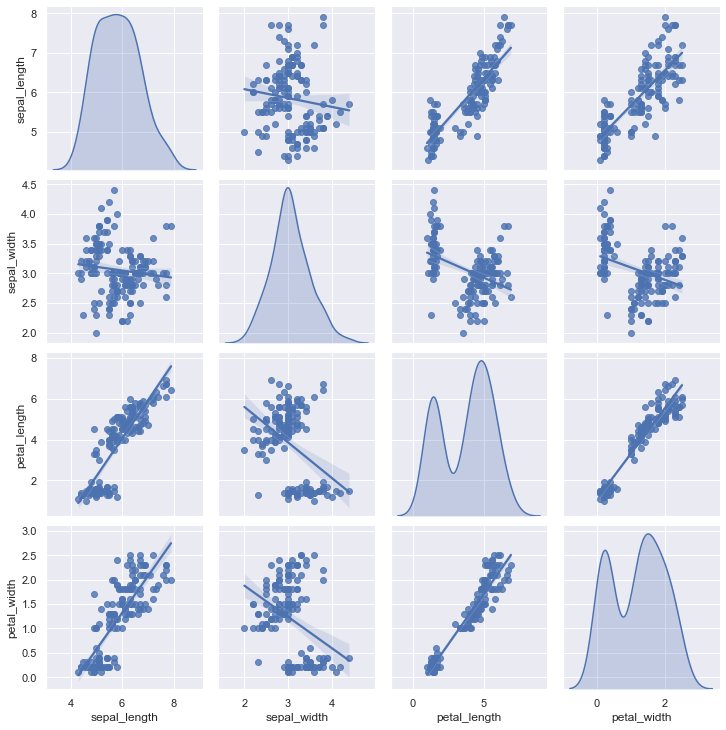

In [42]:
# 修改默认的图像
sns.pairplot(iris,diag_kind="kde",kind="reg")

# 线性关系绘图

许多数据集含有多个定量变量（数值型变量），而我们分析的目的往往是将他们关联起来。我们曾讨论过通过两个变量的联合分布来实现这一点。然而，使用统计模型来为两组带有噪声数据的观测值评估出一个简单的关系可以是非常有用的。

seaborn中的回归图主要是为了在EDA（探索数据分析）阶段为发掘数据中存在的规律提供一些视觉指引，可以让我们通过可视化快速、轻易地探索数据，毕竟对于探索数据来说，可视化的重要性不比得到一个统计表格低。

## 绘制线性回归模型

seaborn主要通过两个函数来展示通过回归得到的线性关系，**regplot()和lmplot()**。它们紧密相关，而且共享大多数的核心功能。但是弄清楚他们的区别非常重要，这样我们就可以在针对特定工作时快速判断哪个工具更适合。

在最基本的调用过程中，他们都会画出关于x、y两个变量的散点图，同时用数据拟合一个y ~ x的模型出来，并将对应的直线和95%的置信区间绘制出来：

In [43]:
# 导入tips数据集
tips = pd.read_csv("./data/tips.csv")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


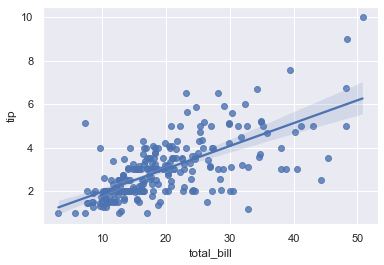

In [44]:
# 使用regplot来绘制回归模型
sns.regplot(x='total_bill',y='tip',data=tips)

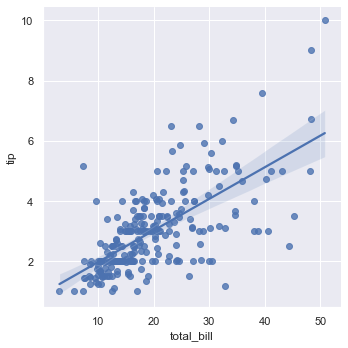

In [45]:
# 使用lmplot来绘制回归模型
sns.lmplot(x='total_bill',y='tip',data=tips)

我们注意到除了图片的形状略有差异，其他地方都是一致的。需要知道的是，他们之间最主要的区别在于:
* regplot:x, y参数接受多种数据类型，包括numpy数组、pandas序列（Series或DataFrame),data可以为空。


* lmplot:x和y参数必须以字符串形式指定,且data参数是不能为空的。

## 拟合不同的模型

简单线性回归的模型非常容易拟合，然而它并不适用于所有数据集。Anscombe's quartet数据集展示了一些例子，在这些例子中简单线性回归提供了变量间关系一致的估计，但是却与我们视觉上的直观判断存在一些差异。比如，在第一个例子中，线性回归是一个很不错的模型：

In [46]:
# 导入anscombe数据集
anscombe = pd.read_csv("./data/anscombe.csv")
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


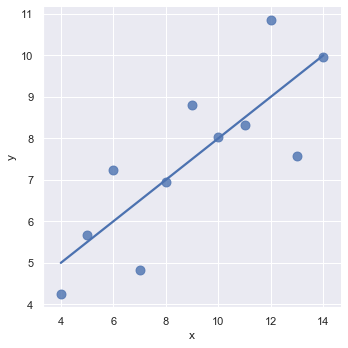

In [47]:
# 当使用数据集I
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80})

* 第二个数据集中有着同样的线性关系，但是我们瞬间就能判断线性回归并不是一个最佳的模型：

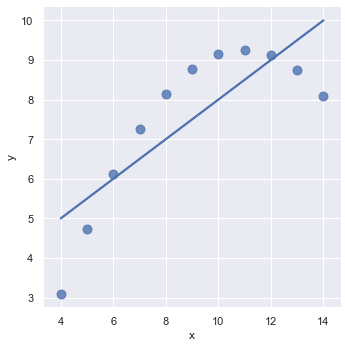

In [48]:
# 使用数据集II
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80})

* 在展示这种更高阶的关系时，lmplot()和regplot()可以通过拟合多项式回归模型来应对数据集中的一些简单的非线性趋势：

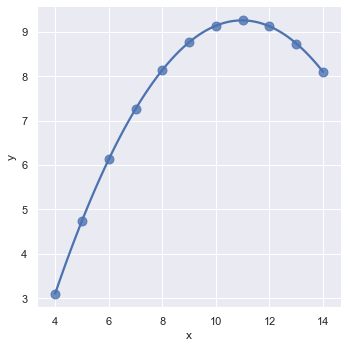

In [49]:
# 添加order参数来拟合一些简单的非线性趋势
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80})

* 另一个问题是由异常观测点导致的，这些观测点明显偏离了我们想要得到的主要趋势关系：

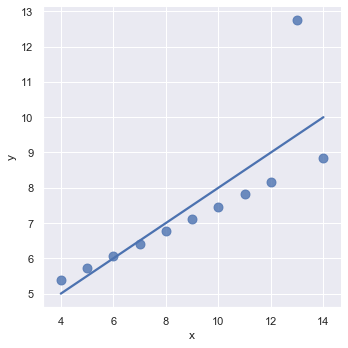

In [50]:
# 使用数据集III
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80})

在异常观测值存在时，我们可以拟合一个鲁棒回归(稳定回归)，它使用了不同的损失函数，对较大的残差做了降权：

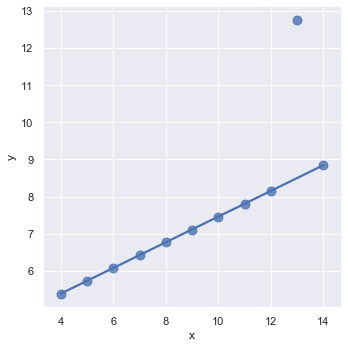

In [51]:
# 添加robust参数，来拟合一个鲁棒回归
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80})

* 要注意的是，相对于简单线性回归，逻辑回归估算具有相当高的计算复杂度（稳健回归也是）。考虑到围绕着回归线的置信区间是通过自主抽样过程计算的（也会花费大量时间），在拟合逻辑回归等模型时最好把置信区间的计算给关掉（ci=None）。


## 考虑其他变量的影响

上边我们展示了很多探索一对变量之间关系的可视化方式。然而在很多情况下，“两个变量之间的关系如何受到第三个变量的影响”是一个更加有趣的问题。在这里regplot()和lmplot()的差异就出现了：regplot()只能展示简单的关系，而lmplot()则融合了regplot()和FacetGrid。因此，lmplot()可以轻易地探索最多三个额外变量带来的交互作用。

分离一个关系最好的方式就是将不通水平的数据绘制在同一个坐标轴体系内，并且用颜色来区分他们：

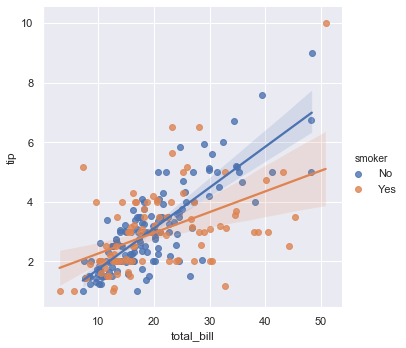

In [52]:
# 添加hue参数来添加第三个变量
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

* 除了颜色，我们还可以通过标记样式来区分不同的水平（分类），这样就可以更好的应对黑白色调或色盲读者。我们可以控制调色板：

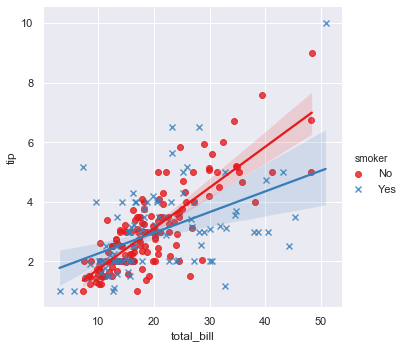

In [53]:
# 改变标记样式来区分不同的分类
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1")

* 我们可以通过更多的子图（行、列）来引入新的变量：

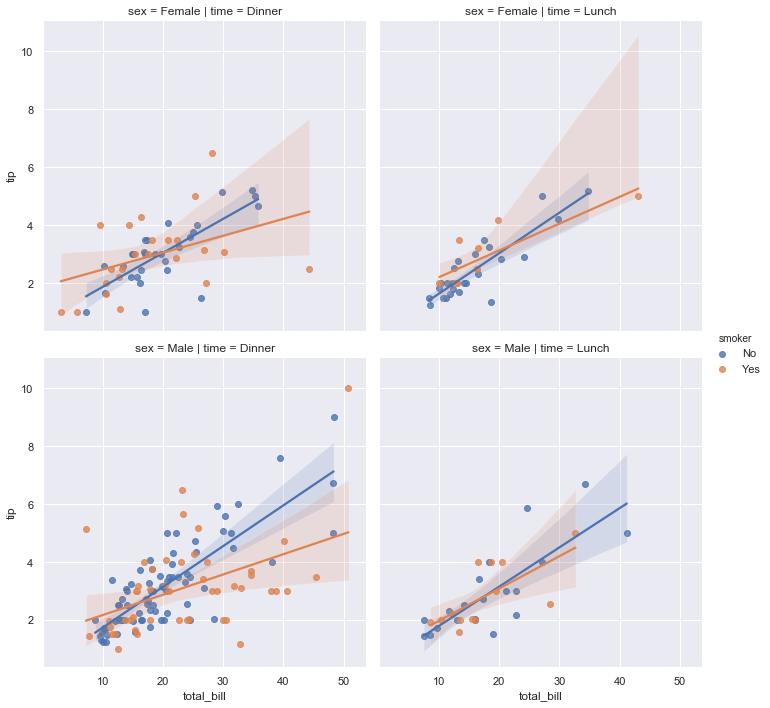

In [54]:
# 添加行列来引入新的变量
sns.lmplot(x="total_bill", y="tip", hue="smoker", 
           col="time",row='sex',data=tips)

## 在其他背景中添加回归图

有一些seaborn函数会在其他更大、更复杂的图形背景中使用regplot()，第一个就是我们在数据分布教程中提到的jointplot()函数。


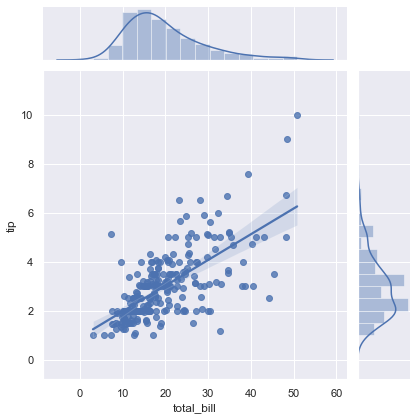

In [55]:
# 在二维分布绘图jointplot中，添加线性关系
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg")

# FacetGrid结构图

之前我们在绘图的时候，展示了relplot、catplot、lmplot等，这些函数可以通过col、row等在一个Figure中绘制多个图。这些函数之所以有这些功能，是因为他们的底层使用了FacetGrid来组装这些图形。

## 普通的Axes绘图

在学习FacetGrid绘图之前，先来了解一下，实际上seaborn的绘图函数中也有大量的直接使用Axes进行绘图的，凡是函数名中已经明确显示了这个图的类型，这种图都是使用Axes绘图的。比如sns.scatterplot、sns.lineplot、sns.barplot等。Axes绘图可以直接使用之前matplotlib的一些方式设置图的元素。示例代码如下：

In [56]:
# 导入tips数据集进行演示
tips = pd.read_csv("./data/tips.csv")

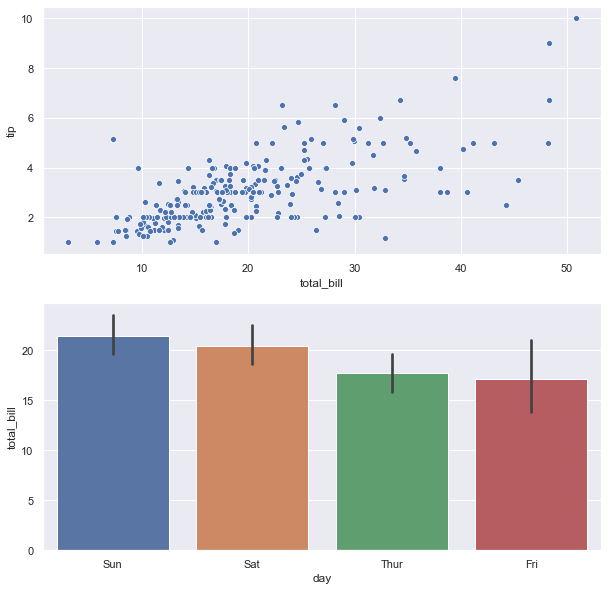

In [57]:
# 使用matplotlib定义axes
fig,[ax1,ax2] = plt.subplots(2,1,figsize=(10,10))

# 使用seaborn进行绘图
sns.scatterplot(x="total_bill",y="tip",data=tips,ax=ax1)
sns.barplot(x="day",y="total_bill",data=tips,ax=ax2)

## FacetGrid基本使用

先创建一个FacetGrid对象，然后再调用这个对象的map方法。其中map方法的第一个参数是一个函数，后续map将调用这个函数来绘制图形。后面的参数就是传给这个函数的参数。示例代码如下：

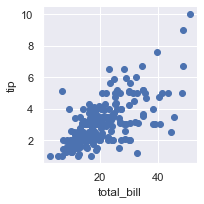

In [58]:
# 创建一个FacetGrid对象
g = sns.FacetGrid(tips)

# 调用map函数进行绘制图形
g.map(plt.scatter,"total_bill","tip")

其中第一个参数是可以绘制Axes图，并且可以接收color参数的函数。可以取的值如下：

|参数	|描述	|对应使用了FacetGrid函数|
|:--:|:--:|:--|
|plt.plot/sns.lineplot|	绘制折线图	|sns.relplot(kind="line")
|plt.hexbin|	绘制六边形图形	|sns.jointplot(kind="hex")
|plt.hist|	绘制直方图	|sns.distplot
|plt.scatter/sns.scatterplot|	绘制散点图	|sns.relplot(kind="scatter")
|sns.stripplot	|绘制分类散点图	|sns.catplot(kind="strip")
|sns.swarmplot	|绘制散开来的分类散点图	|sns.catplot(kind="swarm")
|sns.boxplot	|绘制箱型图	|sns.catplot(kind="box")
|sns.violinplot	|绘制小提琴图	|sns.catplot(kind="violin")
|sns.pointplot	|绘制点线图	|sns.catplot(kind="point")
|sns.barplot	|绘制条形图	|sns.catplot(kind="bar")
|sns.countplot	|绘制数量柱状图	|sns.catplot(kind="count")
|sns.regplot	|绘制带有回归线的散点图	|sns.lmplot

### 绘制多个图形

FacetGrid可以通过col和row参数，来在一个Figure上绘制多个图形，其中col和row都是数据集中的某个列的名字。只要指定这个名字，那么就会自动的按照指定列的值的个数绘制指定个数的图形。示例代码如下：

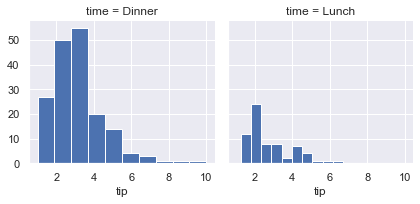

In [59]:
# 创建一个FacetGrid对象，并添加col参数
g = sns.FacetGrid(tips,col="time",col_wrap=2)

# 绘制线性回归模型
g.map(plt.hist,"tip")

### 添加颜色观察字段

可以通过添加hue参数来控制每个图中元素的颜色来观察其他的字段。示例代码如下：

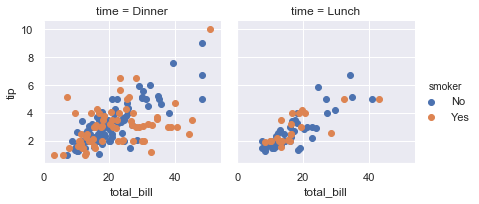

In [60]:
# 创建一个FacetGrid对象，并添加col参数
g = sns.FacetGrid(tips,col="time",hue="smoker")

# 绘制线性回归模型
g.map(plt.scatter,"total_bill","tip")

# 添加图例
g.add_legend()

* 也可以通过hue_kws参数来添加hue散点的属性，比如设置散点的样式等。

### 设置每个图形的尺寸

使用FacetGrid绘制出图形后，有时候我们想设置每个图形的尺寸或者是宽高比，那么我们可以通过在FacetGrid中设置height和aspect来实现，其中height表示的是每个图形的尺寸（默认是宽高一致），aspect表示的是宽度/高度的比例。示例代码如下：

D:\python\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


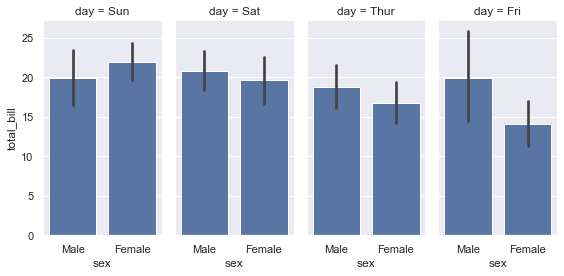

In [61]:
# 创建FacetGrid对象，并设置height和aspect
g = sns.FacetGrid(tips,col="day",height=4,aspect=0.5)
g.map(sns.barplot,"sex","total_bill")

* 它默认会从DataFrame中推导分类的顺序。当然，我们完全可以通过*_order参数直接指定某个维度变量的顺序：

In [62]:
# 按照数量得到day的索引 
ordered_days = tips.day.value_counts().index
ordered_days

Index(['Sat', 'Sun', 'Thur', 'Fri'], dtype='object')

D:\python\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


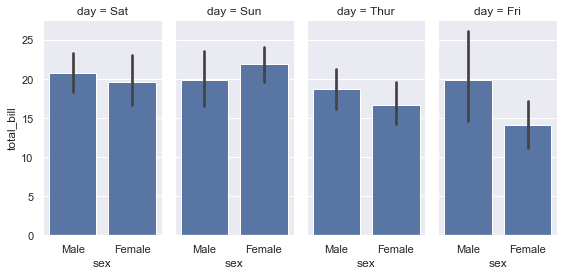

In [63]:
# 创建FacetGrid对象，并添加col_order
g = sns.FacetGrid(tips,col="day",height=4,aspect=0.5,col_order=ordered_days)

# 绘制条形图
g.map(sns.barplot,"sex","total_bill")

### 设置图例

默认情况下，不会添加图例，我们可以通过g.add_legend()来添加图例。示例代码如下：

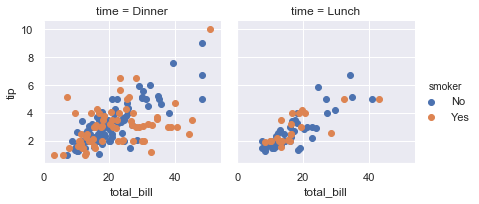

In [64]:
# 创建一个FacetGrid对象
g = sns.FacetGrid(tips,col="time",hue="smoker")

# 绘制线性回归模型
g.map(plt.scatter,"total_bill","tip")

# 添加图例
g.add_legend()

另外还可以：
* 通过title来控制图例的标题。
* 通过label_order来控制图例元素的顺序。

示例代码如下：

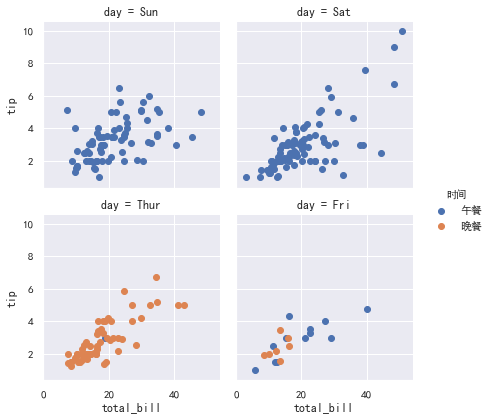

In [65]:
# 创建一个FacetGrid对象
g = sns.FacetGrid(tips,col="day",hue="time",col_wrap=2)

# 绘制散点图
g.map(plt.scatter,"total_bill","tip")

# 设置字体为黑体（可以显示中文）
sns.set(rc={"font.sans-serif":"simhei"})

# 添加time的中文解释
new_labels = ['午餐','晚餐']

# 用title控制图例的标题
g.add_legend(title="时间")

# 修改图例
for t,l in zip(g._legend.texts,new_labels):
    t.set_text(l)

### 设置标题

设置标题可以通过g.set_titles(template=None,row_template=None,col_template=None)来实现，这三个参数分别代表的意义如下：

* template：给图设置标题，其中有{row_var}：绘制每行图像的名称，{row_name}：绘制每行图像的值，{col_var}：绘制每列图像的名称，{col_name}：绘制每列图像的值这几个参数可以使用。


* col_template：给图像设置列的标题。其中有{col_var}以及{col_name}可以使用。


* row_template：给图像设置行的标题。其中有{row_var}以及{row_name}可以使用。


示例代码如下：

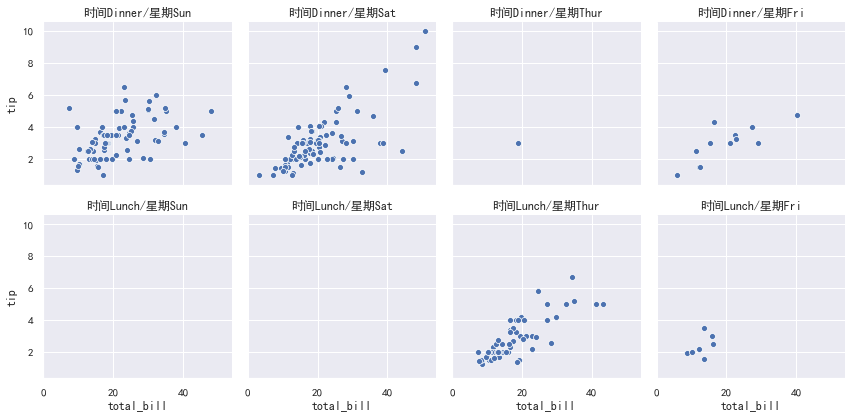

In [66]:
# 创建一个FacetGrid对象
g = sns.FacetGrid(tips,col="day",row="time")

# 绘制散点图
g.map(sns.scatterplot,"total_bill","tip")

# 设置标题
g.set_titles(template="时间{row_name}/星期{col_name}")

### 设置坐标轴

* g.set_axis_labels(x_var,y_var)：一次性设置x和y的坐标的标题。
* g.set_xlabels(label)：设置x轴的标题。
* g.set_ylabels(label)：设置y轴的标题。
* g.set(xticks,yticks)：设置x和y轴的刻度。
* g.set_xticklabels(labels)：设置x轴的刻度文字。
* g.set_yticklabels(labels)：设置y轴的刻度文字。

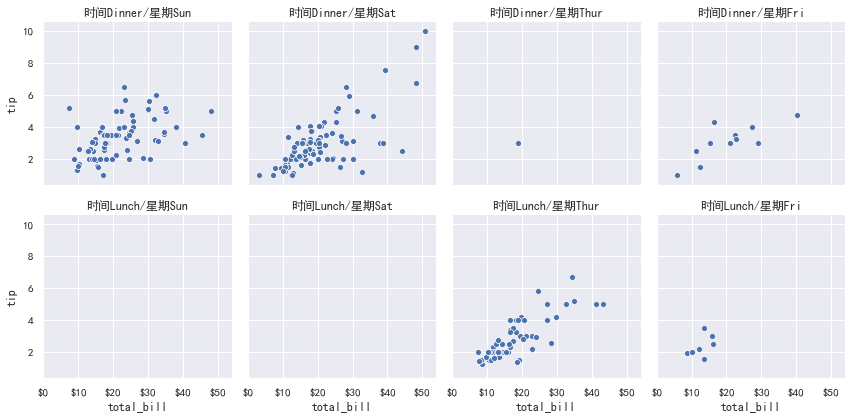

In [67]:
# 创建一个FacetGrid对象
g = sns.FacetGrid(tips,col="day",row="time")

# 绘制散点图
g.map(sns.scatterplot,"total_bill","tip")

# 设置标题
g.set_titles(template="时间{row_name}/星期{col_name}")

# 设置坐标轴
g.set(xticks=range(0,60,10),xticklabels=['$0','$10','$20','$30','$40','$50'])

还可以通过g.set和g.fig来设置子图Axes和画布Figure的属性。

* g.set：g.set方法可以对FacetGrid下的每个子图Axes设置属性，比如可以设置每个Axes的facecolor等。


* g.fig：可以获取到当前的Figure对象。然后通过Figure对象再可以设置其他的属性，比如dpi等。

# seaborn风格设置
用seaborn绘图，比直接使用matplotlib绘图更加的美观。原因就是因为seaborn中已经将一些属性的样式进行了调整。我们可以直接使用，也可以修改他的样式。

## seaborn预设设计风格

seaborn中自带了5种样式。分别是：
* white：纯白色的。
* whitegrid：带有网格的白色的。
* dark：灰色的。
* darkgrid：带有网格的灰色的（网格线是白色的），默认。
* ticks：白色的，并且在轴上带有刻度条的。

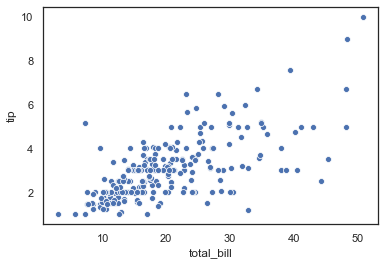

In [68]:
# white样式
sns.set_style("white")
sns.scatterplot(x="total_bill",y="tip",data=tips)

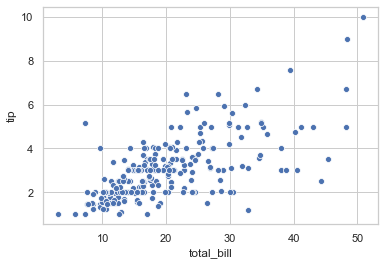

In [69]:
# whitegrid样式
sns.set_style("whitegrid")
sns.scatterplot(x="total_bill",y="tip",data=tips)

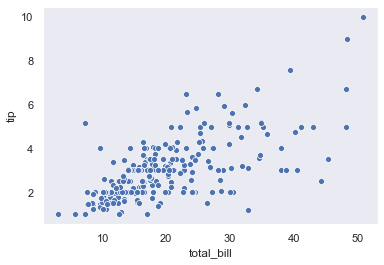

In [70]:
# dark样式
sns.set_style("dark")
sns.scatterplot(x="total_bill",y="tip",data=tips)

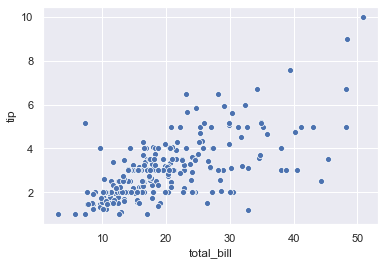

In [71]:
# darkgrid样式
sns.set_style("darkgrid")
sns.scatterplot(x="total_bill",y="tip",data=tips)

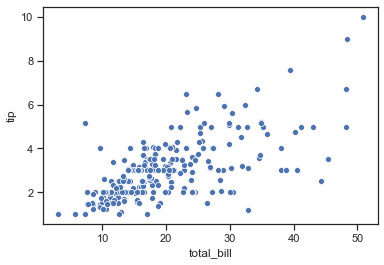

In [72]:
# ticks样式
sns.set_style("ticks")
sns.scatterplot(x="total_bill",y="tip",data=tips)

## 去掉图形边线

在white和ticks主题中，我们并不需要上边和右边的边界。我们可以使用despine()来干掉他们：

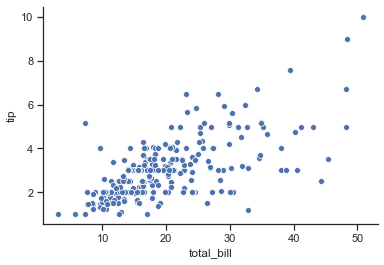

In [73]:
# 绘制图像
sns.scatterplot(x="total_bill",y="tip",data=tips)

# 去掉上边和右边的边界
sns.despine()

* 我们也可以通过额外的参数来决定去除哪些边界：

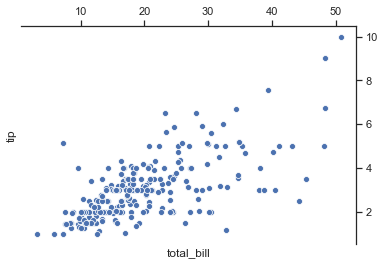

In [74]:
# 绘制图像
sns.scatterplot(x="total_bill",y="tip",data=tips)

# 去掉左边和下边的边界
sns.despine(left=True,bottom=True,top=False,right=False)

## 临时修改设计风格

虽然我们可以很容易地改来改去，但有些情况下，我们使用with语句搭配axes_style()函数会更好。使用这种方法，我们可以在一张图的不同坐标轴中使用不同的设计

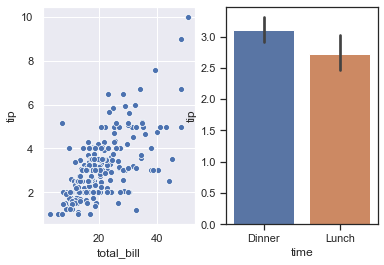

In [75]:
# 创建一个画布
f = plt.figure()

# 使用with和sns.axes_style进行临时风格设定
with sns.axes_style("darkgrid"):
    # 添加子图1，并进行darkgrid风格的绘制图形
    ax = f.add_subplot(1, 2, 1)
    sns.scatterplot(x="total_bill",y="tip",data=tips)
    
# 添加子图2，并按照默认风格进行绘制图形
ax = f.add_subplot(1, 2, 2)
sns.barplot(x="time",y="tip",data=tips)

## 重载seaborn的设计元素

如果我们想定制seaborn的设计风格，我们还可以给axes_style()或者set_style()的rc参数传递一个字典，这个字典由各种各样的设置项组成。需要注意的是，我们只能重载那些已经被定义好的选项。（不过更高级的set()函数可以接受任何matplotlib参数组成的字典）。

如果我们想看它们支持哪些选项，我们可以不加任何参数地调用它们，这样它们就会返回当前的配置：

In [76]:
# 显示当前seaborn的配置
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

* 然后我们就可以进行修改和重载了：

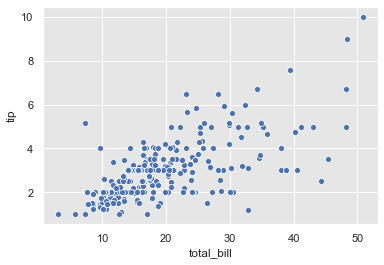

In [77]:
# 修改seaborn风格，并绘制图形
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.scatterplot(x="total_bill",y="tip",data=tips)

## 缩放图形元素

有一系列单独的参数可以用于控制图形元素的缩放，这样我们就可以使用同样的代码来使得我们的图片可以适应不同的应用场景（有时可能需要更大的图片，但有时却刚好相反）。

首先我们先重置所有的设置：

In [78]:
# 重置seaborn的设置
sns.set()

我们有四种预设的背景，按照相对大小来排序，分别是paper、notebook、talk和poster。上文的那些图片中使用的都是默认的notebook风格，下面展示4种风格。

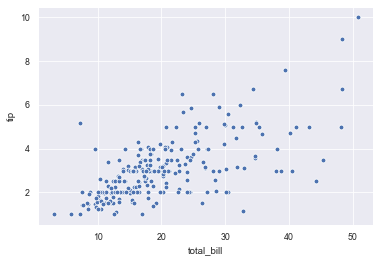

In [79]:
# 设置paper风格
sns.set_context("paper")
sns.scatterplot(x="total_bill",y="tip",data=tips)

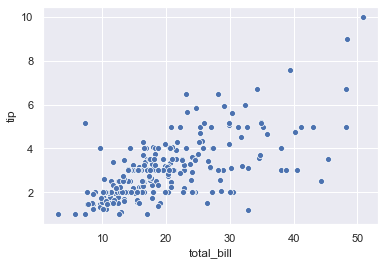

In [80]:
# 设置notebook风格
sns.set_context("notebook")
sns.scatterplot(x="total_bill",y="tip",data=tips)

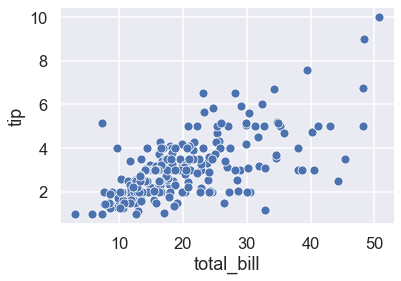

In [81]:
# 设置talk风格
sns.set_context("talk")
sns.scatterplot(x="total_bill",y="tip",data=tips)

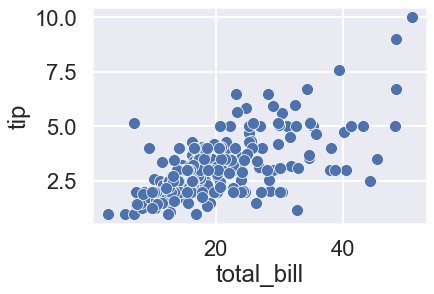

In [82]:
# 设置poster风格
sns.set_context("poster")
sns.scatterplot(x="total_bill",y="tip",data=tips)

# seaborn调色盘设置

seaborn可以非常迅速的做出优美的图形，其中就应该得力于他的调色盘机制。seaborn根据应用场景提供了三种不同类型的调色盘：定性的、连续的、发散的。

## 定性调色盘
定性调色盘。一般在数据不连续，比较离散，想体现分类的情况下使用。在seaborn中，使用sns.color_palette来创建调色盘。

### 默认调色盘

在seaborn中，默认情况下就设置了一些颜色供绘图使用。使用sns.color_palette即可获取。并且我们可以通过sns.palplot来绘制调色盘。示例代码如下：

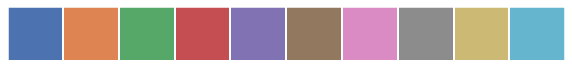

In [83]:
# 获取当前的调色盘设置
current_palette = sns.color_palette()

# 绘制调色盘
sns.palplot(current_palette)

默认的调色盘有10种颜色。这些颜色都有6种风格。分别是：deep，muted，pastel， bright，dark，colorblind。这几种风格的颜色不变，主要调整的是亮度和饱和度。
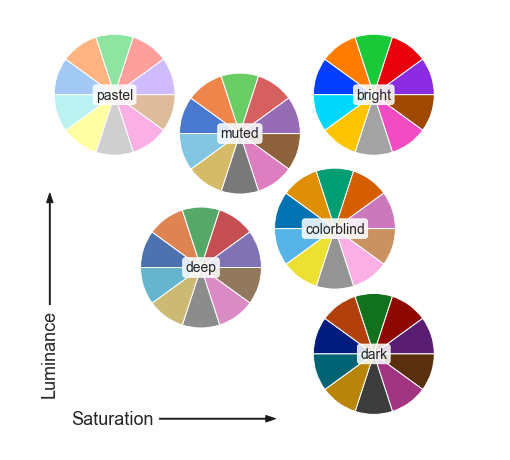

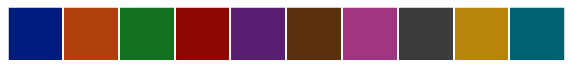

In [84]:
# 设置调色盘的风格为dark
current_palette = sns.color_palette("dark")

# 绘制调色盘
sns.palplot(current_palette)

### hls圆形颜色系统

hls圆形颜色系统是颜色按照顺序，经过偏移，无缝形成一个圆形。我们在使用这个调色盘的时候，可以指定需要使用多少种颜色。示例代码如下：

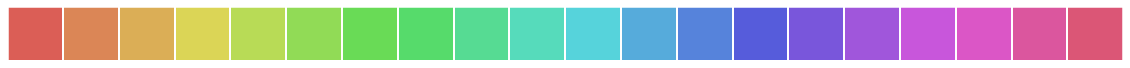

In [85]:
# 使用hls圆形颜色系统，取20个颜色
sns.palplot(sns.color_palette("hls",20))

也可以使用另外一个函数sns.hls_palette(n_colors=6, h=0.01, l=0.6, s=0.65)来实现。这个函数可以传递更多的参数。
* h: 更改开始的颜色
* l: 调整亮度
* s: 调整饱和度

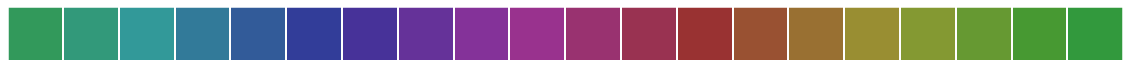

In [86]:
# 通过调整h、l和s来调整开始的颜色，亮度和饱和度
sns.palplot(sns.hls_palette(20,h=0.4,l=0.4,s=0.5))

另外也可以通过sns.husl_palette来实现色系的调整，这个方法比sns.hls_palette亮度和饱和度更加的均匀。

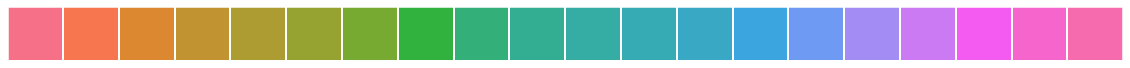

In [87]:
# 使色系的亮度和饱和度更均匀
sns.palplot(sns.husl_palette(20))

### 分类颜色

分类颜色是seaborn已经提前给你定义了一些颜色，使用这些颜色在做分类分组的时候可以按照自己的需求选择。示例代码如下：

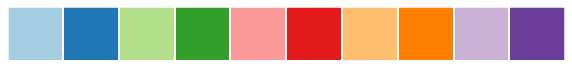

In [88]:
# 显示5组颜色对
sns.palplot(sns.color_palette("Paired",10))

关于分类的颜色选择，可以通过sns.choose_colorbrewer_palette("qualitative")来查看。这个方法只能用在jupyter notebook中。可以选择不同的样式，然后还可以调节饱和度等。

In [89]:
# 选择不同的样式
sns.choose_colorbrewer_palette("qualitative")

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),
 (0.21568627450980393, 0.4941176470588236, 0.7215686274509804),
 (0.3019607843137256, 0.6862745098039216, 0.29019607843137263),
 (0.5960784313725492, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (0.9999999999999998, 1.0, 0.19999999999999996),
 (0.6509803921568629, 0.33725490196078434, 0.1568627450980391),
 (0.9686274509803922, 0.5058823529411766, 0.7490196078431374),
 (0.6, 0.6, 0.6)]

### 用xkcd颜色

xkcd是一个漫画名称或者是工作室。xkcd开展了一项众包活动，为随机的RGB颜色命名。这产生了一组954种命名颜色。详细的颜色可以查看官网https://xkcd.com/color/rgb/ 一些示例如下：

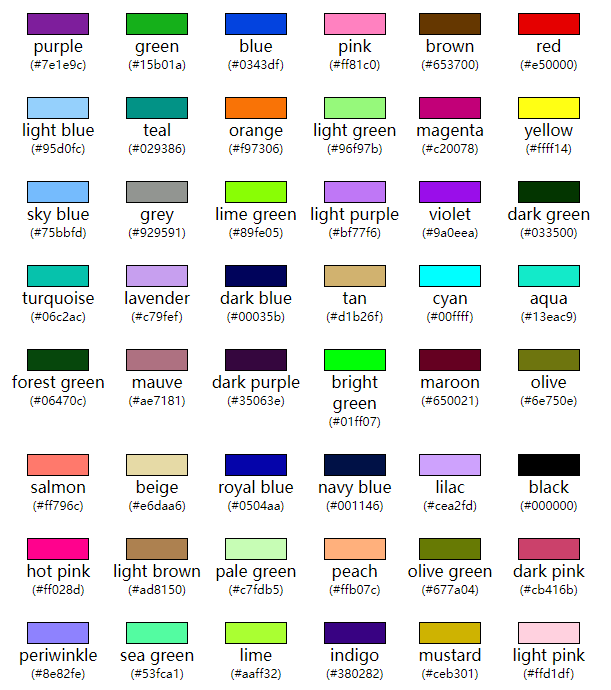

我们可以从sns.xkcd_palette里面提取颜色。提取到后，如果想要用在palette参数中，那么还需要放到sns.xkcd_palette中。

#137e6d


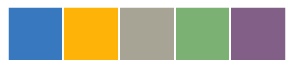

In [90]:
# 获取名字为blue green的颜色
print(sns.xkcd_rgb["blue green"])

# 用xkcd的颜色名称构建一个palette对象
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))

## 连续颜色盘

有时候我们绘图的时候，想要使用一个同种色系，但是不同深浅，这时候就可以使用连续的颜色盘。示例代码如下：

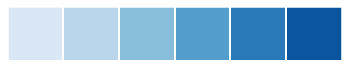

In [91]:
# 绘制同一色系的颜色盘
sns.palplot(sns.color_palette("Blues"))

* 默认颜色是从浅入深，如果想要从深变浅，那么可以在色系后加一个_r。示例代码如下：

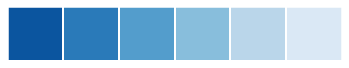

In [92]:
# 由深到浅的颜色盘
sns.palplot(sns.color_palette("Blues_r"))

* 我们也可以通过sns.choose_colorbrewer_palette("sequential")查看有哪些色系可供选择。

In [93]:
sns.choose_colorbrewer_palette("sequential")

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

[(0.9575547866205305, 0.9575547866205305, 0.9575547866205305),
 (0.9012072279892349, 0.9012072279892349, 0.9012072279892349),
 (0.8328950403690888, 0.8328950403690888, 0.8328950403690888),
 (0.7502191464821223, 0.7502191464821223, 0.7502191464821223),
 (0.6434140715109573, 0.6434140715109573, 0.6434140715109573),
 (0.5387158785082661, 0.5387158785082661, 0.5387158785082661),
 (0.440322952710496, 0.440322952710496, 0.440322952710496),
 (0.342883506343714, 0.342883506343714, 0.342883506343714),
 (0.22329873125720878, 0.22329873125720878, 0.22329873125720878),
 (0.10469819300269129, 0.10469819300269129, 0.10469819300269129)]

## 离散调色盘

离散的色盘，是两边的颜色逐渐加深，中间的颜色最淡。或者是中间的颜色最深，两边的颜色最淡。一般离散的色盘可以用于比如温度，零度以上可以用红色表示，零度以下用蓝色表示。越红的地方，表示温度越高，越蓝的地方，表示温度越低。示例代码如下：

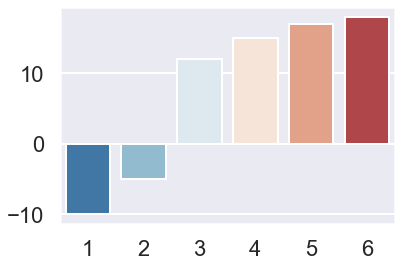

In [94]:
# 构建一个温度数据
values = [12,15,17,18,-5,-10]

# 用离散调色盘来绘制条形图
with sns.color_palette("RdBu_r"):
    sns.barplot([1,2,3,4,5,6],sorted(values))

* 也可以通过sns.choose_colorbrewer_palette("diverging")查看离散的色盘有哪些可以选择。

In [95]:
# 查看离散调色盘
sns.choose_colorbrewer_palette("diverging")

interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

[(0.6922722029988467, 0.09227220299884642, 0.16770472895040373),
 (0.8392156862745099, 0.376470588235294, 0.3019607843137253),
 (0.9545559400230679, 0.641753171856978, 0.5057285659361783),
 (0.9921568627450982, 0.8588235294117645, 0.7803921568627449),
 (0.9657054978854286, 0.9672433679354094, 0.9680891964628989),
 (0.8196078431372551, 0.8980392156862745, 0.9411764705882353),
 (0.5664744329104192, 0.7687043444828916, 0.8685121107266438),
 (0.26274509803921564, 0.576470588235294, 0.7647058823529411),
 (0.1272587466359093, 0.39584775086505203, 0.6687427912341407)]

* 还可以通过sns.diverging_palette(h_neg, h_pos, s=75, l=50, sep=10, n=6, center='light', as_cmap=False)来自定义离散色盘。